In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install numpy
!pip install keras
!pip install scikit-learn
!pip install matplotlib
!pip install imutils

# --------------Driver Drowsiness Detection using Deep Learning--------------

In [179]:
# Importing Dependencies
import tensorflow as tf
import cv2 
import os
import matplotlib.pyplot as plt
import numpy as np

In [181]:
#data_path = r'C:\Users\Dell\Downloads\Dataset'
#for dirpath, dirnames, filenames in os.walk(data_path):
#  print(f"{len(dirnames)} folder and {len(filenames)} images in {dirpath}")

In [183]:
#import os
#from sklearn.model_selection import train_test_split
#import shutil

# Path to your main dataset folder
#data_path = r'C:\Users\Dell\Downloads\Dataset'

# Initialize lists to store file paths
#closed_eye_images = []
#open_eye_images = []

# Get the images from both subfolders
#closed_eye_path = os.path.join(data_path, 'Close-Eyes')
#open_eye_path = os.path.join(data_path, 'Open-Eyes')

# Collect image paths for closed eyes
#closed_eye_images = [os.path.join(closed_eye_path, f) for f in os.listdir(closed_eye_path) if f.endswith('.jpg') or f.endswith('.png')]

# Collect image paths for open eyes
#open_eye_images = [os.path.join(open_eye_path, f) for f in os.listdir(open_eye_path) if f.endswith('.jpg') or f.endswith('.png')]

# Combine both lists
#all_images = closed_eye_images + open_eye_images

# Check if images were found
#if len(all_images) == 0:
#    print("No images found in the dataset. Please check your folder structure.")
#else:
#    print(f"Found {len(all_images)} images.")

# Split dataset into training and test sets (80% train, 20% test)
#train_files, test_files = train_test_split(all_images, test_size=0.2, random_state=42)

# Create directories for train and test splits
#os.makedirs('train/closed_eyes', exist_ok=True)
#os.makedirs('train/open_eyes', exist_ok=True)
#os.makedirs('test/closed_eyes', exist_ok=True)
#os.makedirs('test/open_eyes', exist_ok=True)

# Move the images into the appropriate directories
#for file in train_files:
#    if 'closed eyes' in file:
#        shutil.move(file, 'train/closed_eyes')
#    else:
#        shutil.move(file, 'train/open_eyes')

#for file in test_files:
#    if 'closed eyes' in file:
#        shutil.move(file, 'test/closed_eyes')
#    else:
#        shutil.move(file, 'test/open_eyes')

#print("Dataset split completed!")


In [185]:
#print(f"Found {len(closed_eye_images)} images.")
#print(f"Found {len(open_eye_images)} images.")

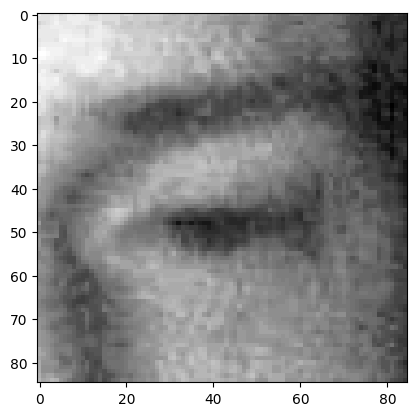

In [187]:
img_array = cv2.imread(r'C:\Users\Dell\Downloads\train\open eyes\s0005_00710_0_0_1_0_0_01.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array,cmap='grey')

In [188]:
img_array.shape

(85, 85)

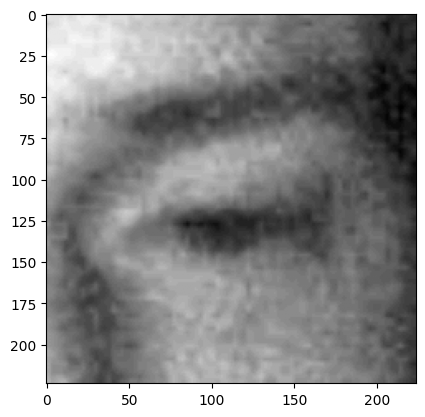

In [191]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array,cmap='grey')
plt.show()

In [192]:
DataDirectory = r'C:\Users\Dell\Downloads\train'
Classes = ['open eyes','close eyes']

In [195]:
# The image is of the size 107 x 107
# We will have to resize the image to 224 x 224 

# Resizing Image

In [198]:
training_data = []

def creating_training_data():
    for category in Classes:
        path = os.path.join(DataDirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

creating_training_data()

In [199]:
print(len(training_data))

3223


# To avoid overfitting problems

In [201]:
import random
random.shuffle(training_data)

# Feature Extraction and Labeling

In [203]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)                  # For grayscale
X = np.repeat(X, 3, axis=-1)                                        # Convert to RGB
Y = np.array(y)

In [204]:
X.shape

(3223, 224, 224, 3)

In [205]:
Y.shape

(3223,)

# Normalization

In [207]:
X = X/255.0

# Using Pickle to save the Progress 

In [209]:
import pickle

with open("X_pickle", "wb") as pickle_out:
    pickle.dump(X, pickle_out)
    print("X Pickle file saved successfully!")

with open("Y_pickle", "wb") as pickle_out:
    pickle.dump(Y, pickle_out)
    print("Y Pickle file saved successfully!")


X Pickle file saved successfully!
Y Pickle file saved successfully!


#                    Deep Learning Architecture Creation using Transfer Learning

In [211]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [212]:
 model = tf.keras.applications.mobilenet.MobileNet()

In [216]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [217]:
# If necessary

#from keras.utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Transfer Learning Implementation

In [219]:
base_input = model.input                          #Input layer
base_output = model.layers[-4].output             #Output Layer

In [220]:
flat_layer = layers.Flatten()(base_output)
Final_Output = layers.Dense(1)(flat_layer)
Final_Output = layers.Activation('sigmoid')(Final_Output)

In [224]:
new_model = keras.Model(inputs = base_input, outputs = Final_Output)

In [225]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,229,889 (12.32 MB)

 Trainable params: 3,208,001 (12.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

# Settings for the Binary Classification

In [227]:
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [228]:
new_model.fit(X,Y,epochs=5,validation_split = 0.1)  # Training

Epoch 1/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 363s 4s/step - accuracy: 0.9346 - loss: 0.1522 - val_accuracy: 0.8885 - val_loss: 0.7844
Epoch 2/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 363s 4s/step - accuracy: 0.9966 - loss: 0.0146 - val_accuracy: 0.5077 - val_loss: 8.9592
Epoch 3/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 341s 4s/step - accuracy: 0.9968 - loss: 0.0090 - val_accuracy: 0.9505 - val_loss: 0.2123
Epoch 4/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 331s 4s/step - accuracy: 0.9898 - loss: 0.0466 - val_accuracy: 0.9845 - val_loss: 0.0492
Epoch 5/5
91/91 ━━━━━━━━━━━━━━━━━━━━ 329s 4s/step - accuracy: 0.9999 - loss: 0.0022 - val_accuracy: 0.9938 - val_loss: 0.0426


In [230]:
#Saving the model after the training
new_model.save('drowsy_model.keras')  

In [231]:
# Loading the saved model into the program
new_model = tf.keras.models.load_model('drowsy_model.keras')

# Making Predictions

In [278]:
img = cv2.imread(r'C:\Users\Dell\Downloads\test\open eyes\s0009_00377_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE)
img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))

In [280]:
x_input = np.array(img_resized).reshape(1,IMG_SIZE,IMG_SIZE,3)

In [282]:
x_input.shape

(1, 224, 224, 3)

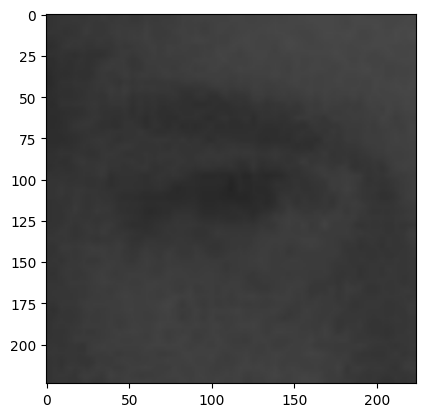

In [284]:
plt.imshow(img_resized)

In [286]:
x_input = x_input/255.0

In [288]:
prediction = new_model.predict(x_input)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[6.183069e-06]], dtype=float32)

In [268]:
img = cv2.imread(r'C:\Users\Dell\Downloads\test\close eyes\s0037_01517_1_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))

In [270]:
x_input = np.array(img_resized).reshape(1,IMG_SIZE,IMG_SIZE,3)
x_input.shape

(1, 224, 224, 3)

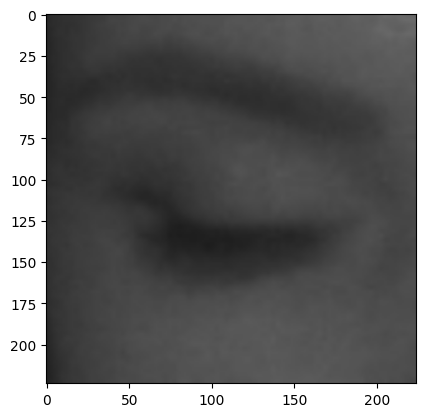

In [272]:
plt.imshow(img_resized)

In [273]:
x_input = x_input/255.0

In [274]:
prediction = new_model.predict(x_input)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[0.00093823]], dtype=float32)

In [ ]:
# Face Cascade

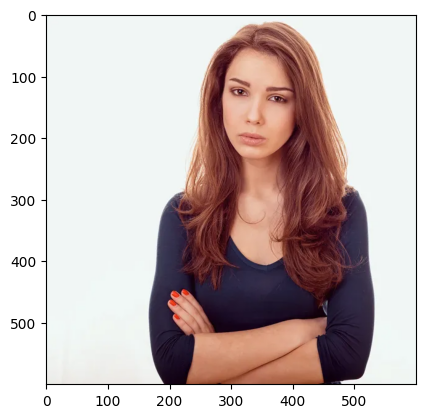

In [441]:
img = cv2.imread(r'C:\Users\Dell\Downloads\sad lady.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [442]:
FaceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
EyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [445]:
grey =cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

In [447]:
eyes = EyeCascade.detectMultiScale(grey, 1.3, 5)

In [449]:
for (x, y, w, h) in eyes:
    cv2.rectangle(img_rgb,(x,y),(x+w,y+h),(0,255,0),3)

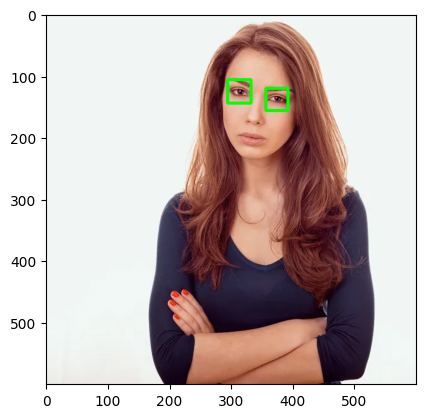

In [451]:
plt.imshow(img_rgb)

In [453]:
# Cropping the eye from the image

In [455]:
EyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
grey =cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
eyes = EyeCascade.detectMultiScale(grey, 1.3, 5)
for (x, y, w, h) in eyes:
    roi_grey = grey[y:y+h,x:x+w]
    roi_color = img_rgb[y:y+h,x:x+w]
    eyess = EyeCascade.detectMultiScale(roi_grey)
    if len(eyess) == 0:
        print("Couldn't detect eyes!!!!")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey:ey+eh,ex:ex+ew]

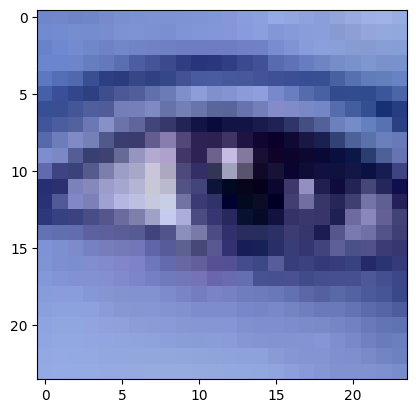

In [457]:
plt.imshow(cv2.cvtColor(eyes_roi,cv2.COLOR_BGR2RGB))

In [459]:
eyes_roi.shape

(24, 24, 3)

In [461]:
fimg = cv2.resize(eyes_roi,(224,224))
fimg = np.expand_dims(fimg, axis = 0)
fimg = fimg/255.0

In [463]:
fimg.shape

(1, 224, 224, 3)

In [465]:
new_model.predict(fimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


array([[1.0421095e-10]], dtype=float32)

# Real Time Implementation

In [473]:
import cv2
import numpy as np

# Load the Haar cascades for face and eye detection
FaceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
EyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Open the video capture
cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Unable to access the camera")
    exit()

status = ''

while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to grab frame from camera")
        break

    # Convert the frame to grayscale
    grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect eyes
    eyes = EyeCascade.detectMultiScale(grey, 1.3, 5)
    for (x, y, w, h) in eyes:
        roi_grey = grey[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]  # Corrected `img_rgb` to `frame`

        # Detect eyes in the region of interest
        eyess = EyeCascade.detectMultiScale(roi_grey)
        if len(eyess) == 0:
            print("Couldn't detect eyes!!!!")
        else:
            for (ex, ey, ew, eh) in eyess:
                eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]
                # Resize and normalize the region of interest
                fimg = cv2.resize(eyes_roi, (224, 224))
                fimg = np.expand_dims(fimg, axis=0)
                fimg = fimg / 255.0

                # Predict using the deep learning model (Ensure `new_model` is loaded beforehand)
                pred = new_model.predict(fimg)
                if pred < 0.5:
                    status = 'Open Eyes'
                else:
                    status = 'Drowsy'

    # Detect faces in the frame
    faces = FaceCascade.detectMultiScale(grey, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 3)

    # Display the status on the frame
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, status, (50, 50), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # Show the frame
    cv2.imshow('Driver Drowsiness Detection', frame)

    # Exit loop if 'q' is pressed
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Couldn't detect eyes!!!!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Couldn't detect eyes!!!!
Couldn't detect eyes!!!!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Couldn't detect eyes!!!!
Couldn't detect eyes!!!!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Couldn't detect eyes!!!!
Couldn't detect eyes!!!!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0